# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
%matplotlib inline

In [95]:
data = pd.read_csv('Classified Data - Copy.csv')
df = pd.DataFrame(data)
df.drop('Unnamed: 0',axis=1,inplace=True)

### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [96]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [97]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [98]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [100]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [101]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [103]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

In [104]:
y_test_pred = cross_val_predict(knn, X_test, pred, cv=3)
confusion_matrix(pred, y_test_pred)

array([[224,  33],
       [ 21, 222]], dtype=int64)

***Print Misclassification error rate***

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [106]:
print("\n\n",
     classification_report(pred, y_test_pred))



               precision    recall  f1-score   support

           0       0.91      0.87      0.89       257
           1       0.87      0.91      0.89       243

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [107]:
# I can either calculate it using (FP+FN)/(TP+TN+FP+FN) or (1-Accuracy)
accuracy_sc = accuracy_score(pred, y_test_pred)
error_rate = 1 - accuracy_sc
print('Error rate is {}: '.format(error_rate))

Error rate is 0.10799999999999998: 


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
def cross_val_err(K):
    knn = KNeighborsClassifier(n_neighbors=K)
    cross_scr = cross_val_score(knn,df_feat,df["TARGET CLASS"])
    return 1-np.mean(cross_scr)

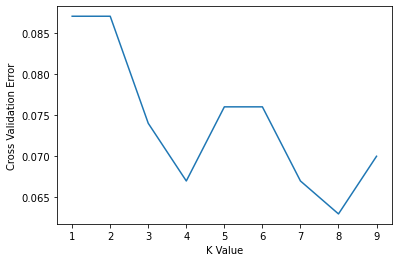

In [110]:
err_list = []
k_range = range(1,10)
for k in k_range:
    err_list.append(cross_val_err(k))

plt.plot(k_range,err_list)
plt.xlabel("K Value")
plt.ylabel('Cross Validation Error')
plt.show()